<a href="https://colab.research.google.com/github/msalvati1997/mushrooms_classificator/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushrooooms : analisi della commestibilità dei funghi



Lo scopo del progetto è quello di predire se dato un fungo sconosciuto, esso sia commestibile o meno, sulla base dell'integrazione di diverse funzionalità di Machine learning offerte da librerie software.

Il dataset utilizzato è Mushrooms 2 UCI, della Philipps-University (Marburg, Germania), ed include 61069 ipotetici funghi con cappello basati su 173 specie (353 funghi per specie).
Ogni fungo è identificato come commestibile, velenoso, o di
commestibilità sconosciuta e sconsigliata (quest'ultima classe è combinata con la classe velenosa).

I funghi appartenenti al suddetto dataset sono stati ottenuti a partire da un dataset primario contenente informazioni su alcuni funghi descritti all'interno di un'enciclopedia.

Seguono gli attributi del dataset.

Feature | Meaning
------ | ------
cap-diameter (m)| float number in cm
cap-shape (n)| bell=b, conical=c, convex=x, flat=f, sunken=s,spherical=p, others=o
cap-surface (n)| fibrous=i, grooves=g, scaly=y, smooth=s,shiny=h,leathery=l, silky=k, sticky=t,wrinkled=w, fleshy=e
cap-color (n)| brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l,orange=o, black=k
does-bruise-or-bleed (n)| bruises-or-bleeding=t,no=f
gill-attachment (n)| adnate=a, adnexed=x, decurrent=d, free=e,sinuate=s, pores=p, none=f, unknown=?
gill-spacing (n)|close=c, distant=d, none=f
gill-color (n)| see cap-color + none=f
stem-height (m)| float number in cm
stem-width (m)| float number in mm
stem-root (n)| bulbous=b, swollen=s, club=c, cup=u, equal=e,rhizomorphs=z, rooted=r
stem-surface (n)| see cap-surface + none=f
stem-color (n)| see cap-color + none=f
veil-type (n)| partial=p, universal=u
veil-color (n)| see cap-color + none=f
has-ring (n)| ring=t, none=f
ring-type (n)| cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l,pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
spore-print-color (n)| see cap color
habitat (n)| grasses=g, leaves=l, meadows=m, paths=p, heaths=h,urban=u,waste=w, woods=d
season (n)| spring=s, summer=u, autumn=a, winter=w




## 1 Analisi dei dati


### 1.1 Importazione delle librerie

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn.metrics as mt
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as ss
from statsmodels.stats.multicomp import pairwise_tukeyhsd

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 1.2 Importazione del dataset


In [263]:
df = pd.read_csv("https://raw.githubusercontent.com/msalvati1997/mushrooms_classificator/main/secondary_data.csv") 

In [264]:
print("Dimensionalità del dataset:")
print("# Istanze :", df.shape[0])
print("# Attributi :", df.shape[1]-1)
print("Feature Target : class")

Dimensionalità del dataset:
# Istanze : 61069
# Attributi : 20
Feature Target : class


#### 1.2.1 Manipolazione dataset

##### 1.2.1.2 Valori mancanti

Una volta importato il dataset, ci siamo accorti della mancanza di alcuni valori. 

Gestire i valori mancanti è importante ai fini dell'apprendimento. 

In [265]:
null_table= pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
null_table.columns=['null ratio']
null_table

,null ratio
veil-type,0.947977
spore-print-color,0.895954
veil-color,0.878613
stem-root,0.843931
stem-surface,0.624277
gill-spacing,0.410405
cap-surface,0.231214
gill-attachment,0.161850
ring-type,0.040462
class,0.000000


Effetuiamo la sostituzione dei valori mancanti.

In [266]:
df.fillna('')
for col in df.columns:
   df[col]= df[col].replace('','-')
   df[col]= df[col].replace(np.nan,'-')


In [267]:
null_table= pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
null_table.columns=['null ratio']
null_table

,null ratio
class,0.0
stem-root,0.0
habitat,0.0
spore-print-color,0.0
ring-type,0.0
has-ring,0.0
veil-color,0.0
veil-type,0.0
stem-color,0.0
stem-surface,0.0


##### 1.2.1.2 Conversione target

Il target è presente nella forma di variabile categorica (e=edible, p=poisonous). Per facilitare la fase di apprendimento, abbiamo convertito la variabile in (1=edible, 0=poisonous).

In [268]:
column_values = df['class'].unique()
count = 0 
print('Class conversion:')
for u in column_values: 
      df['class'] = df['class'].replace(u,count)
      print("\t",u, "->", count)
      count += 1

Class conversion:
	 p -> 0
	 e -> 1


##### 1.2.1.3 Label encoder

Alcune implementazioni di algoritmi di apprendimento automatico richiedono che tutti i dati siano numerici. Ad esempio, scikit-learn ha questo requisito.

Ciò significa che i dati categorici devono essere convertiti in una forma numerica.

In [269]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    if column!= 'class' and column!='stem-height' and column!='stem-width' and column!='cap-diameter':
     df[column] = labelencoder.fit_transform(df[column])

### 1.3 Dataset

In [270]:
df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,6,3,6,0,3,0,10,16.95,...,5,8,11,1,5,1,3,0,0,3
1,0,16.60,6,3,6,0,3,0,10,17.99,...,5,8,11,1,5,1,3,0,0,2
2,0,14.07,6,3,6,0,3,0,10,17.80,...,5,8,11,1,5,1,3,0,0,3
3,0,14.17,2,4,1,0,3,0,10,15.77,...,5,8,11,1,5,1,6,0,0,3
4,0,14.64,6,4,6,0,3,0,10,16.53,...,5,8,11,1,5,1,6,0,0,3
5,0,15.34,6,3,6,0,3,0,10,17.84,...,5,8,11,1,5,1,6,0,0,2
6,0,14.85,2,4,6,0,3,0,10,17.71,...,5,8,11,1,5,1,3,0,0,3
7,0,14.86,6,4,1,0,3,0,10,17.03,...,5,8,11,1,5,1,6,0,0,2
8,0,12.85,2,3,6,0,3,0,10,17.27,...,5,8,11,1,5,1,6,0,0,0
9,0,13.55,2,3,1,0,3,0,10,16.04,...,5,8,11,1,5,1,6,0,0,3


In [271]:
df.describe()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,...,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,0.445087,6.733854,4.041641,4.984100,6.144541,0.173410,2.948141,0.832370,7.338502,6.581538,...,0.479769,2.060964,8.429072,0.052023,0.563396,0.248555,2.369074,0.380439,0.623721,1.053300
std,0.496979,5.264845,2.138630,3.966123,3.171077,0.378605,2.383064,0.860638,3.186426,3.370017,...,1.301808,2.934895,3.218516,0.222075,1.558891,0.432179,1.544033,1.278864,1.265880,1.100575
min,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.480000,2.000000,1.000000,5.000000,0.000000,1.000000,0.000000,5.000000,4.640000,...,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,5.860000,5.000000,4.000000,5.000000,0.000000,2.000000,1.000000,7.000000,5.950000,...,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
75%,1.000000,8.540000,6.000000,9.000000,10.000000,0.000000,5.000000,1.000000,10.000000,7.740000,...,0.000000,4.000000,11.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,1.000000,62.340000,6.000000,11.000000,11.000000,1.000000,7.000000,3.000000,11.000000,33.920000,...,5.000000,8.000000,12.000000,1.000000,6.000000,1.000000,8.000000,7.000000,7.000000,3.000000


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int64  
 3   cap-surface           61069 non-null  int64  
 4   cap-color             61069 non-null  int64  
 5   does-bruise-or-bleed  61069 non-null  int64  
 6   gill-attachment       61069 non-null  int64  
 7   gill-spacing          61069 non-null  int64  
 8   gill-color            61069 non-null  int64  
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  int64  
 12  stem-surface          61069 non-null  int64  
 13  stem-color            61069 non-null  int64  
 14  veil-type             61069 non-null  int64  
 15  veil-color         

### 1.4 Bilanciamento

Verifichiamo ora che il dataset sia bilanciato. Qualora non lo fosse potremmo applicare metodi di ricampionamento come oversampling e undersampling.

In [273]:
col = ['red','green']
lab = ['Poisonous','Edible']
valori = df['class'].value_counts()/df['class'].shape[0]

fig = go.Figure(data=[go.Pie(labels=lab, values=valori, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=col, line=dict(color='white', width=2)))
fig.update_layout(
    title_text="Mushrooms edibility",
    title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='black',
    font_color="black",
)
fig.show()

Vista e considerata la similarità delle percentuali, il dataset risulta essere bilanciato.

### 1.4 Correlazione

Verifichiamo a questo punto la correlazione tra i diversi attributi utilizzando la matrice di correlazione.

#### 1.4.1 Correlazione features 

Per la correlazione delle variabili numeriche è stato usato il coefficente di correlazione di Pearson. 

Il coefficiente di correlazione di Pearson (dal nome di Karl Pearson) può essere utilizzato per riassumere la forza della relazione lineare tra due campioni di dati.
Il coefficiente di correlazione di Pearson è calcolato come la covarianza delle due variabili divisa per il prodotto della deviazione standard di ciascun campione di dati.

L'uso della media e della deviazione standard nel calcolo suggerisce la necessità che i campioni di dati abbiano una distribuzione gaussiana o di tipo gaussiano.

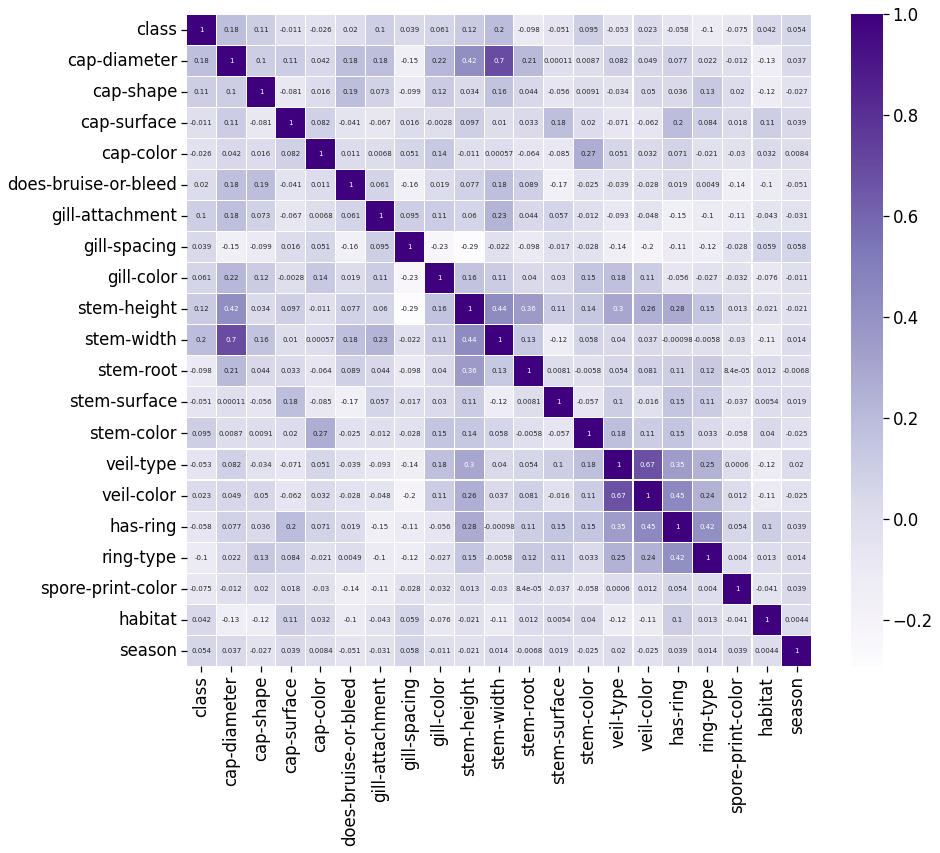

In [274]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

Ai fini della classificazione, la features cap-diameter sembra avere una bassa correlazione con la classe target (0,18)

Conclusioni generiche: 

1.   Cap-diameter e stem-width sono correlati (0,8)
2.   Veil-color e veil-type sono correlati (0,67)
3.   Stem-height e cap-diameter sono leggermente correlati (0,52)
3.   Stem-width e stem-height sono leggermente correlati  (0,44)



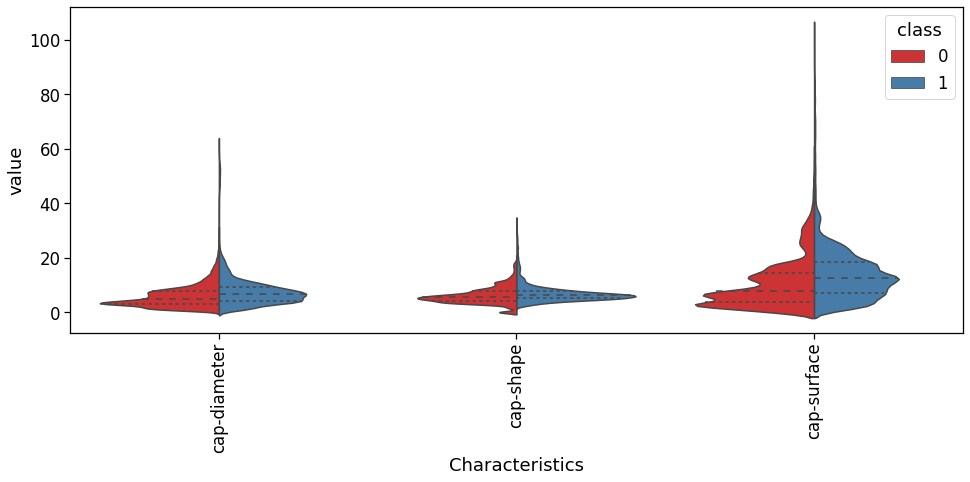

In [275]:
df_div = pd.melt(df[['cap-diameter','stem-height','stem-width','class']], "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

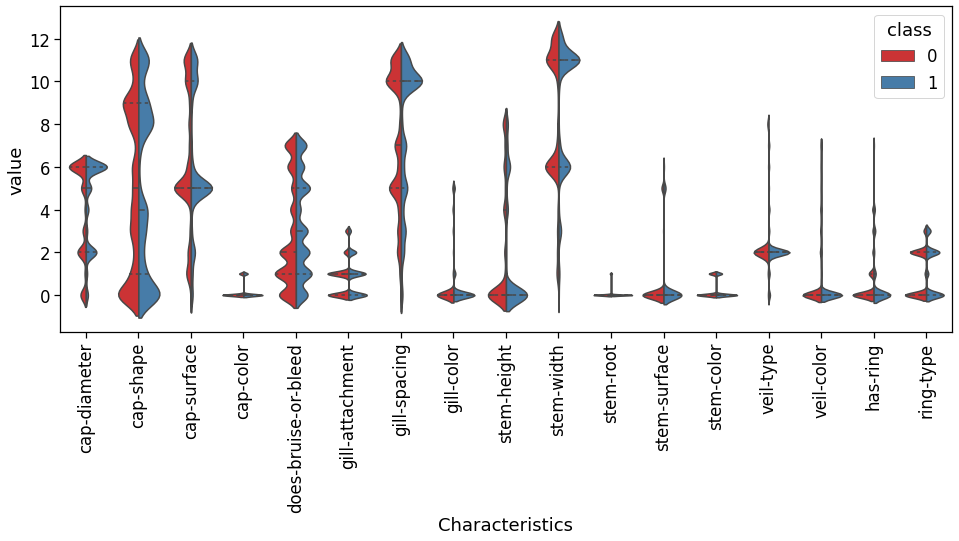

In [276]:
df_cat= df.drop(columns=['cap-diameter','stem-height','stem-width'])
df_div = pd.melt(df_cat, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

Vediamo come variano le distribuzioni delle features numeriche 

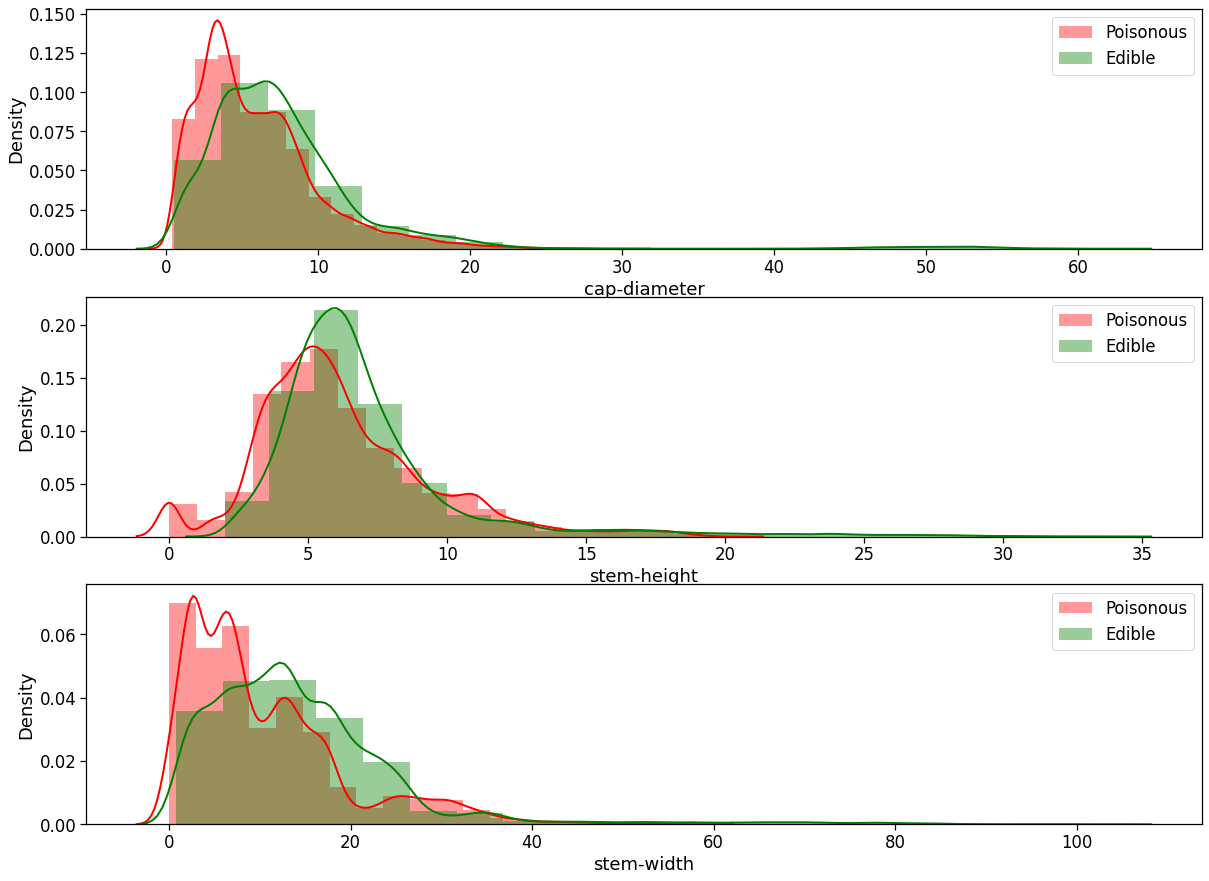

In [277]:
fig = plt.figure(figsize=(20,15))
index = 1
for col in ['cap-diameter','stem-height','stem-width']:
    fig.add_subplot(3,1,index)
    sns.distplot(df[df['class']==0][col].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='Poisonous', color='red')
    sns.distplot(df[df['class']==1][col].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='Edible', color='green')
    index += 1
    plt.legend()

plt.show()


Si evince come gli attributi messi in luce dalla matrice di covarianza tendano ad avere una distribuzione gaussiana e a variare in maniera simile.



#### 1.4.2 Correlazione variabili categoriche

Il coefficente di Pearson non è definito quando le variabili sono categoriche. 

Non possiamo calcolare la correlazione nel caso di variabili categoriche, in quanto la correlazione in termini semplici è :
- se x aumenta, y aumenta, diminuisce o rimane lo stesso. 

Nel caso di variabili categoriali non aumentano né diminuiscono. 
Per le variabili categoriche calcoliamo l'associazione.

Un'opzione comune per gestire questo scenario consiste nell'usare prima la codifica one-hot e suddividere ogni possibile opzione di ciascuna funzionalità categoriale in funzionalità 0 o 1. Ciò consentirà quindi l'uso della correlazione, ma può facilmente diventare troppo complesso da analizzare.

Ciò di cui abbiamo bisogno è qualcosa che assomigli a una correlazione, ma funzioni con valori categoriali — o più formalmente, stiamo cercando una misura di associazione tra due caratteristiche categoriali.

Quindi utilizziamo il V di Cramer. 
Si basa su una variazione nominale del test del chi quadro di Pearson.
- Analogamente alla correlazione, l'output è compreso nell'intervallo [0,1], dove 0 significa nessuna associazione e 1 è un'associazione completa. (A differenza della correlazione, non ci sono valori negativi, poiché non esiste un'associazione negativa. O c'è o non c'è)
- Come la correlazione, la V di Cramer è simmetrica — è insensibile allo scambio di x e y

Il chi-square independence test  è una procedura per verificare se due variabili categoriche sono correlate in una certa popolazione.

In [278]:
''''
crammers V versione modificata

Questa funzione è una variazione dell'effettiva funzione v del crammer
La V di Cramér può essere uno stimatore fortemente distorto della sua controparte della popolazione e tenderà a sovrastimare 
la forza dell'associazione. Viene utilizzata una correzione del bias.
'''

def cramers_v(col1, col2):
    covariance_matrix = pd.crosstab(col1,col2)        #pd.crosstab(col1,col2) creates a contingency table between col1 and col2
    chi2 = ss.chi2_contingency(covariance_matrix)[0]  #it computes the chi-square statistic and p-value for the 
    n = covariance_matrix.sum().sum()
    phi2 = chi2/n
    r,k = covariance_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [279]:
cols=list()
before=list()
for i in df.columns :
   if i != 'cap-diameter' and i!='stem-height' and i!='stem-width' and i!='class':
     before.append(df[i].unique())
     cols.append(i)

In [280]:
import itertools
categorical_var = list(itertools.combinations(cols,2))

In [281]:
row=list()
for pairs in categorical_var:
     data = list()
     value = cramers_v(df[pairs[0]], df[pairs[1]])
     data.append(pairs[0])
     data.append(pairs[1])
     data.append(value)
     row.append(data)

categorical_association = pd.DataFrame(row,columns = ['features1','features2','association']) 
categorical_association.drop_duplicates()

THRESHOLD = 0.6
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(categorical_association.loc[categorical_association['association'] >= THRESHOLD])

           features1     features2  association
58   gill-attachment  gill-spacing        0.638
115        veil-type    veil-color        0.715
117        veil-type     ring-type        0.731
126         has-ring     ring-type        0.891


Andiamo ora a vedere come sono legate le variabili categoriche con la commestibilità. 

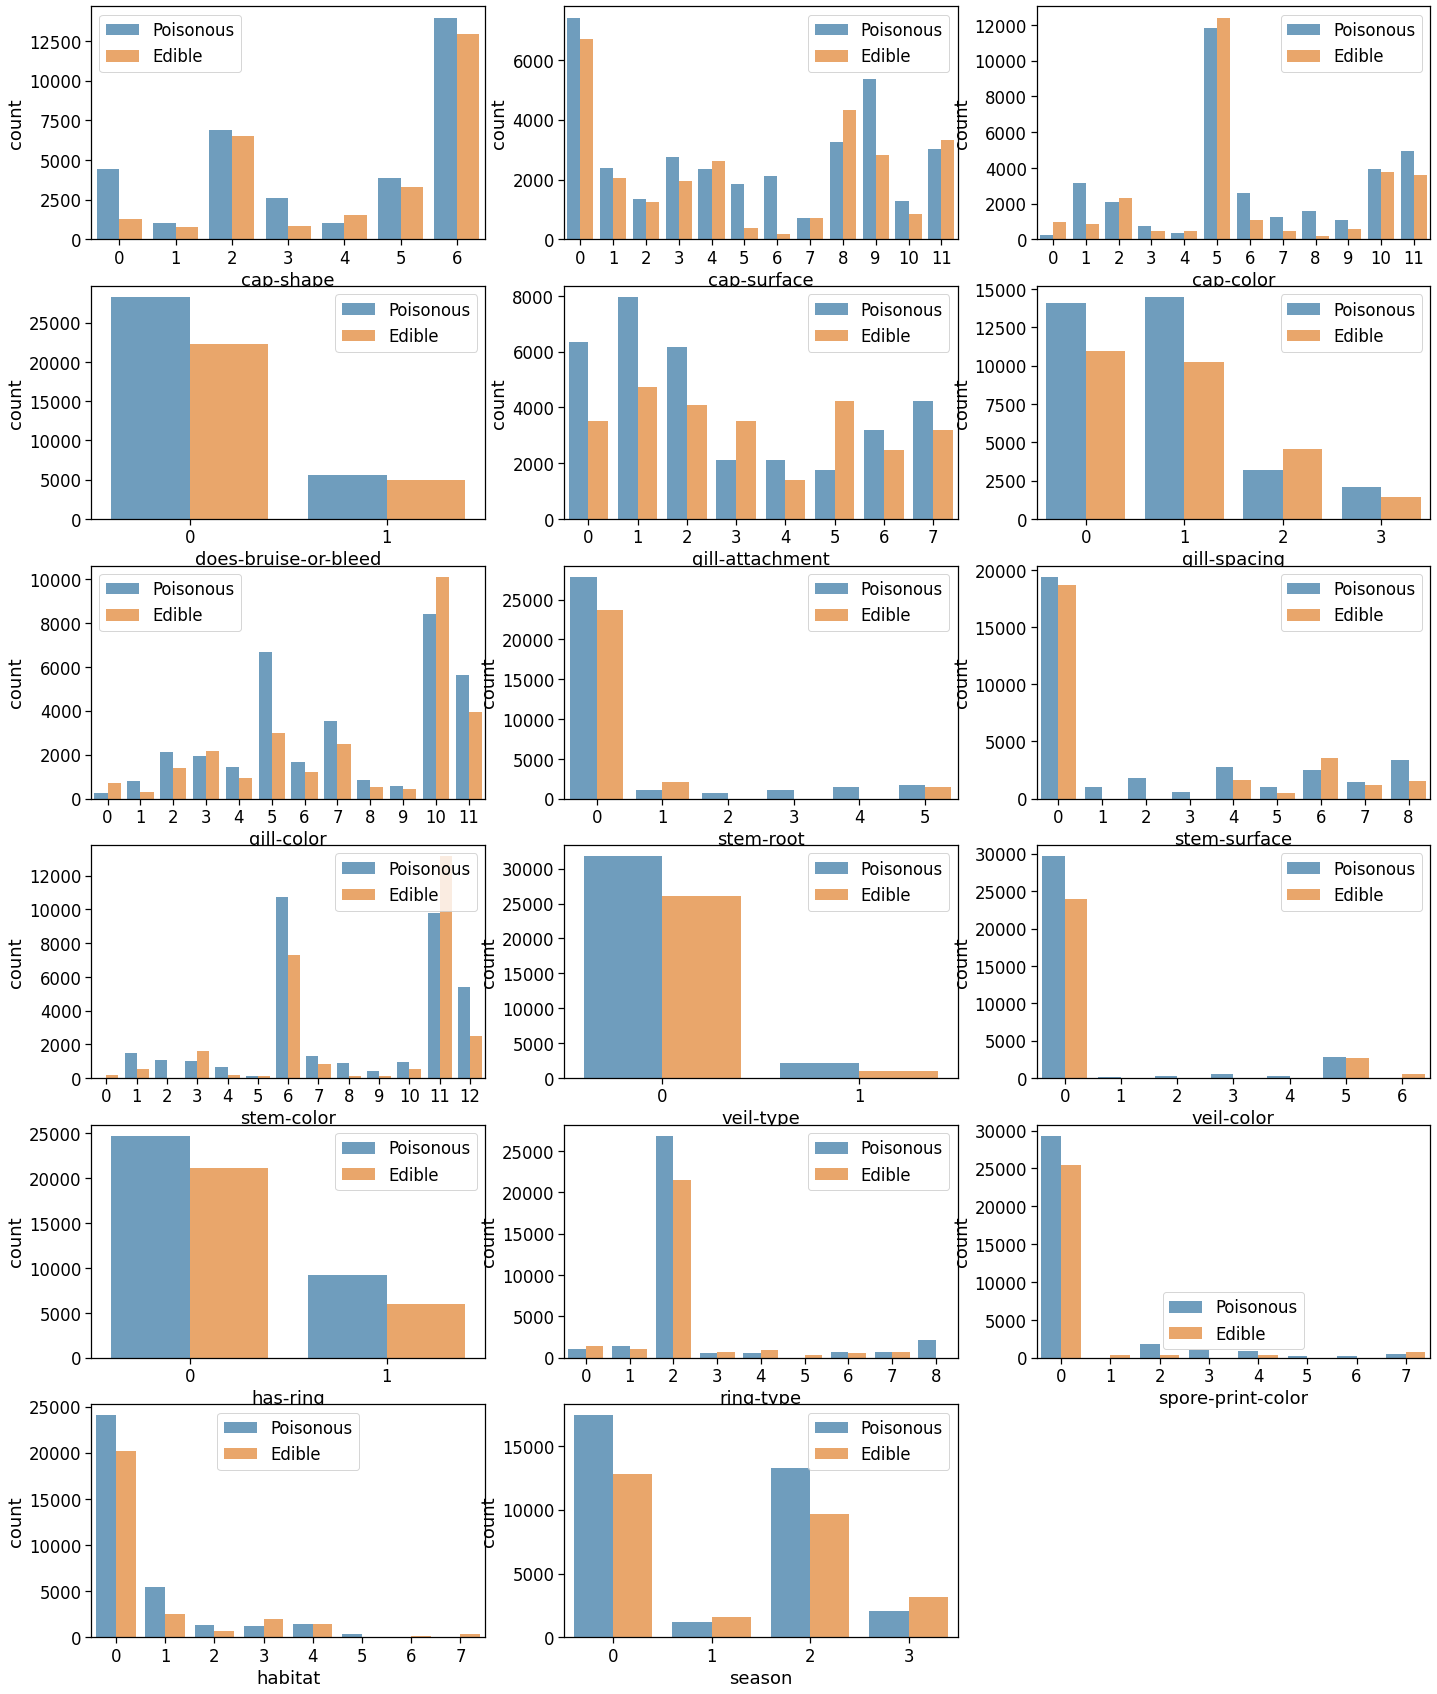

In [282]:
fig = plt.figure(figsize=(24, 30))
i = 1
for col in df.columns:
    if col != 'class' and col != 'cap-diameter' and col != 'stem-height' and col != 'stem-width'  :
        fig.add_subplot(6,3,i)
        g = sns.countplot(x=col, data=df,hue='class', alpha=.7)
        plt.legend(['Poisonous','Edible'])
        i += 1
plt.show()

##### 1.4.2.1 Studio velenosità dei funghi a partire dalle features

La seguente funzione si occupa di calcolare la probabilità che un fungo sia commestibile a partire da un valore di un attributo passato come parametro

In [283]:
def cond_prob(feature):
    r = df[df[feature].notnull()][feature].unique()
    p = []
    for val in r:
        joint = df[(df[feature]==val) & (df['class']==1)].shape[0]
        pre = df[(df[feature]==val)].shape[0]
        post_1 = joint/pre
        p.append([val, post_1])
    return pd.DataFrame(p, columns=['Feature value','probability'])

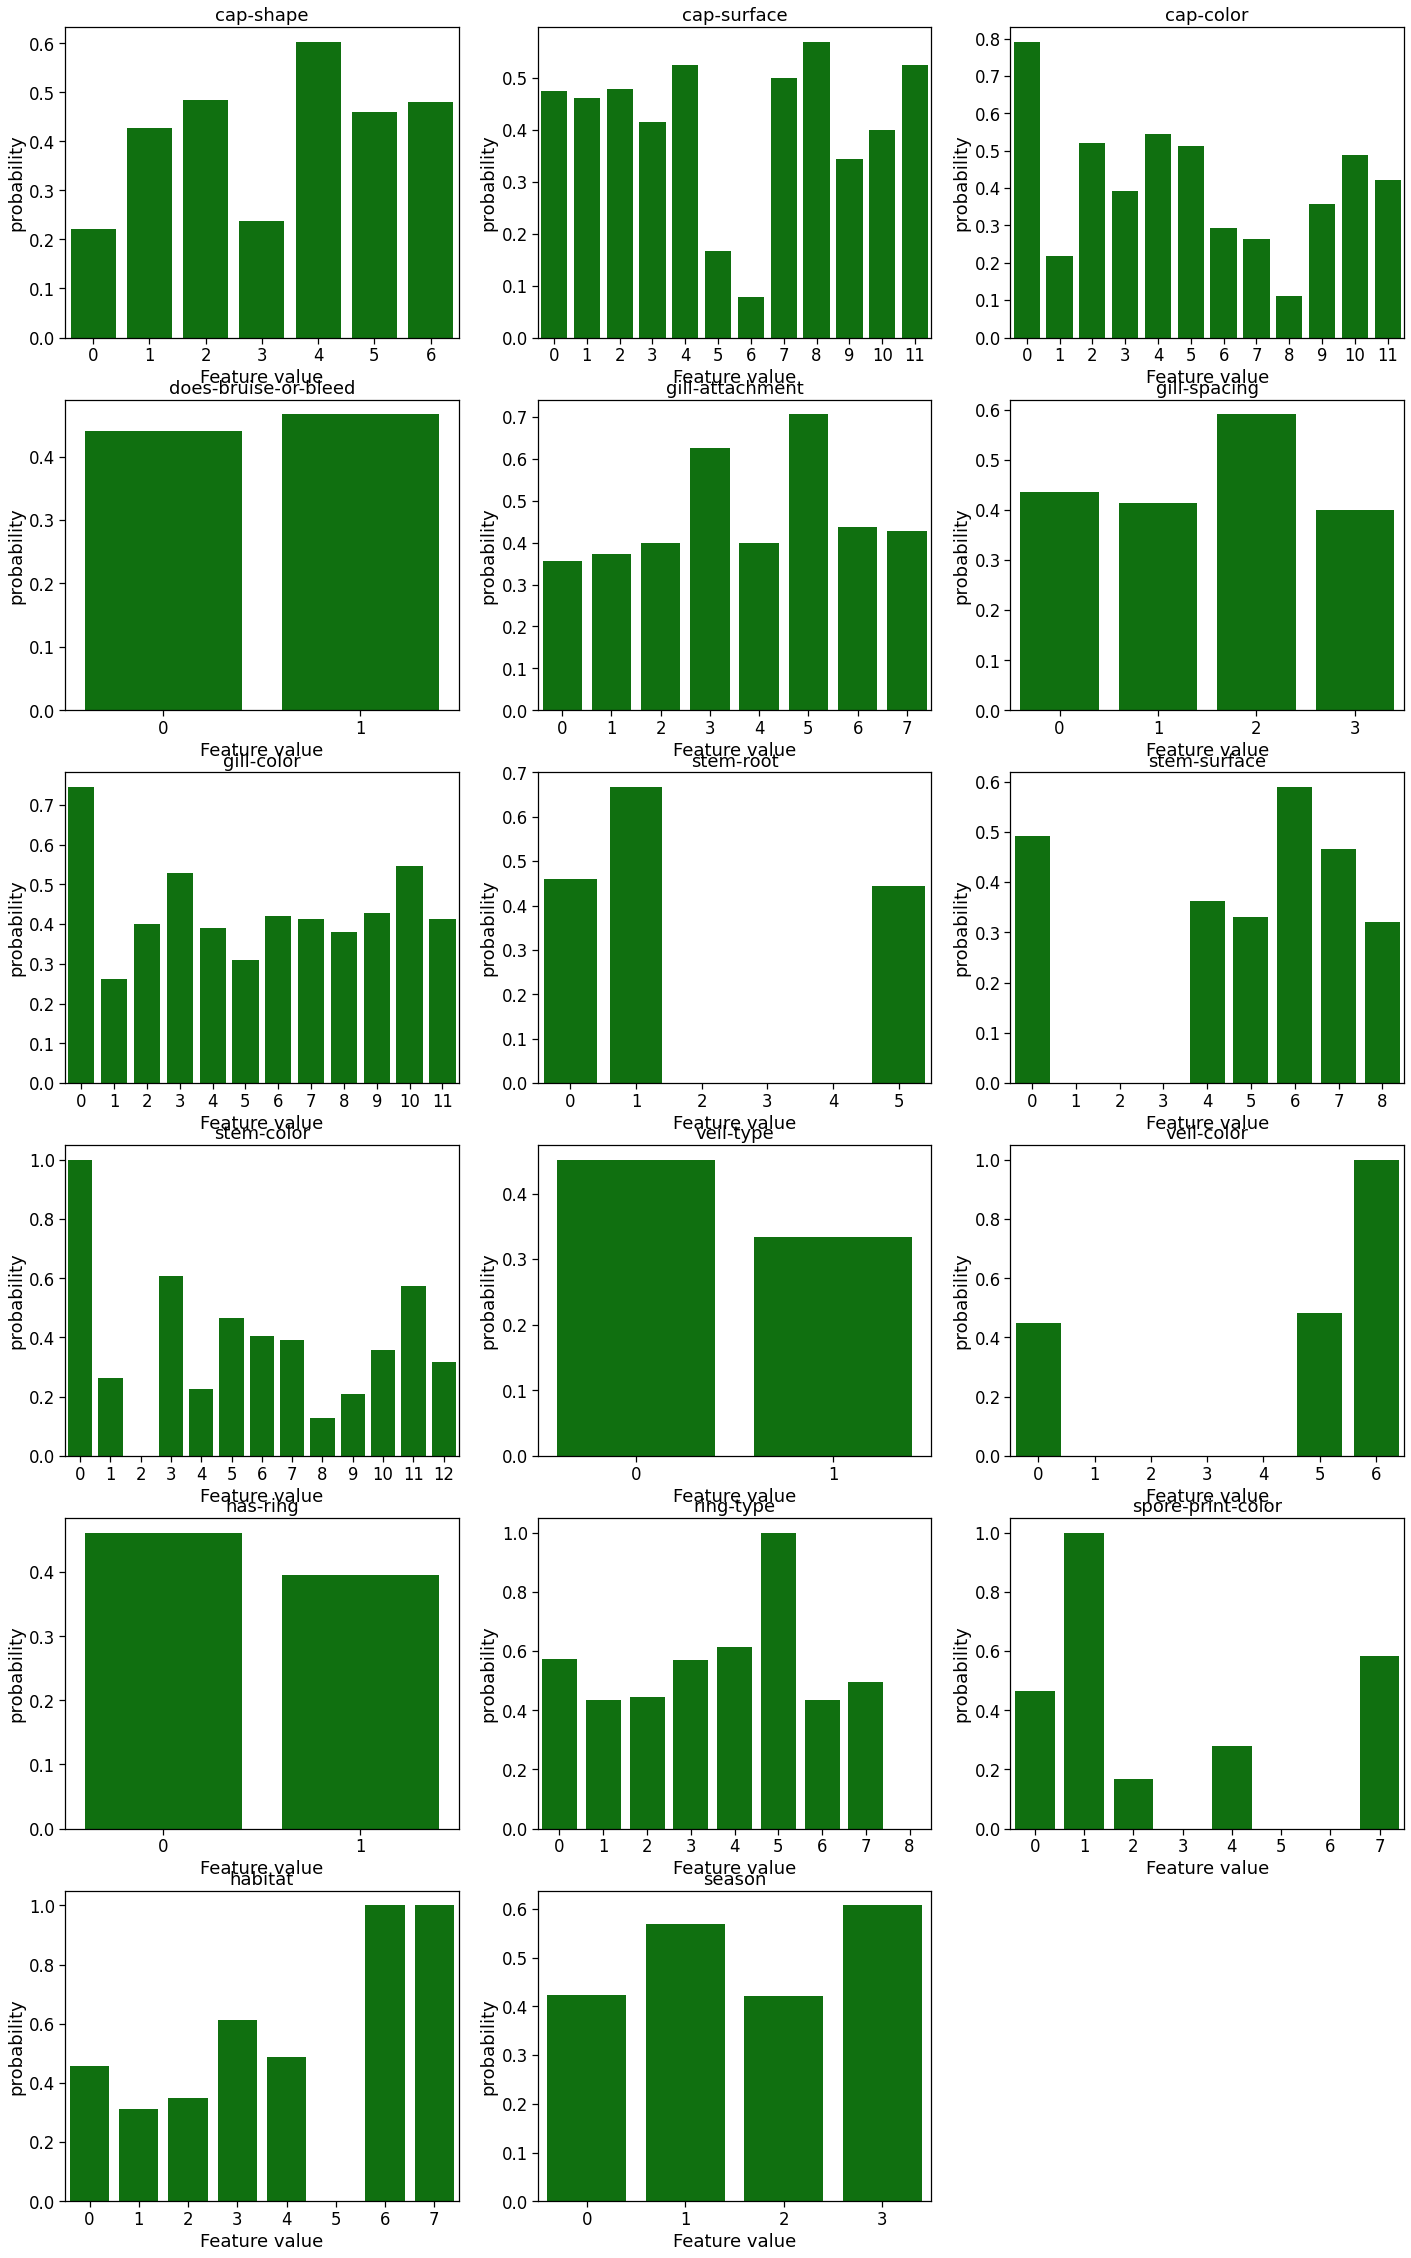

In [284]:
#Probabilità che un fungo sia commestibile a partire dai diversi attributi
fig = plt.figure(figsize=(24, 40))
i=1
for col in df.columns:
  if col != 'class' and col != 'cap-diameter' and col != 'stem-height' and col != 'stem-width':
        fig.add_subplot(6,3,i)
        p = cond_prob(col)
        sns.barplot(x = 'Feature value', y = 'probability', data=p, color='green')
        plt.title(col)
        i+=1
plt.show()

### 1.5 Conclusione

## 2 Manipolazione dati

#### 2.1 Eliminazione valori ridondanti

In [285]:
shape_original = df.shape[0]
print("Dimensionalità del dataset totale: ", df.shape) #Togliamo i dati ridondanti 
df = df.drop_duplicates() 
print("Dimensionalità del dataset senza duplicati",df.shape)
diff = shape_original-df.shape[0]
print("Righe eliminate", diff)

Dimensionalità del dataset totale:  (61069, 21)
Dimensionalità del dataset senza duplicati (60923, 21)
Righe eliminate 146


#### 2.3 Preparazione dataset

In [286]:
X = df.drop(['class'], axis=1)
Y=df['class']
y = np.array(Y,dtype = 'float32')
x = np.array(X,dtype = 'float32')
print(x.shape, y.shape)

(60923, 20) (60923,)


In [287]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=42)

X_TRAIN=pd.DataFrame(x_train)
X_TEST=pd.DataFrame(x_test)

###2.4 Features scaling

Features scaling è un metodo utilizzato per normalizzare l'intervallo di variabili indipendenti o funzionalità dei dati. 

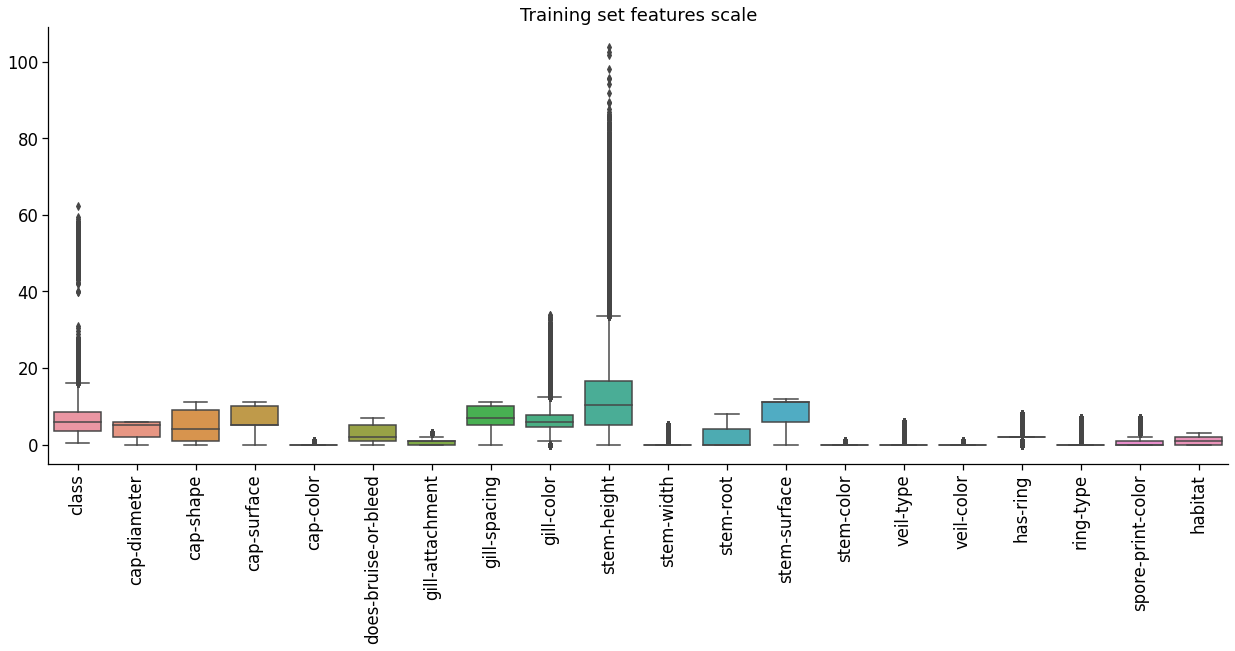

In [288]:
p = sns.factorplot(data=X_TRAIN , kind='box' , size=7, aspect=2.5).set(title='Training set features scale')
p.set_xticklabels(df.columns,rotation=90)

Come si vede nel grafico, i valori sono distribuiti su piccola scala.
Effettuiamo la funzione di scaling per vedere la differenza.

In [289]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

scaler = MinMaxScaler()

d = scaler.fit_transform(x_train)
g = scaler.transform(x_test)
names = X.columns
x_train_scaled = pd.DataFrame(d,columns = names)
x_test_scaled = pd.DataFrame(g, columns = names)

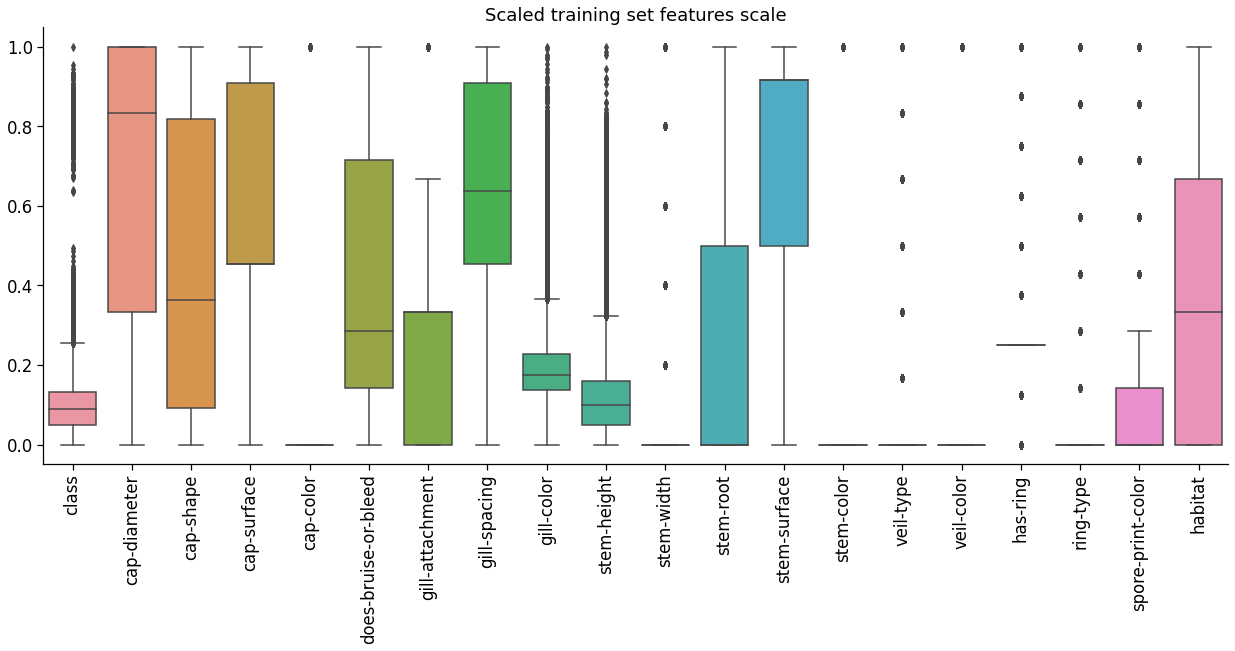

In [290]:
p = sns.factorplot(data=x_train_scaled , kind='box' , size=7, aspect=2.5).set(title='Scaled training set features scale')
p.set_xticklabels(df.columns,rotation=90)

Effettivamente, in questo modo la scala si è ridotta ulteriormente.

In [291]:
x_train=x_train_scaled
x_test=x_test_scaled

### 2.4 Features Selection

Per effettuare la feature selection si può procedere in diversi modi:

- Analisi univariata (mutual information)
- Extra trees selection
- Recursive Feature Elimination (RFE)
- Cross validation
- Tecniche Lasso
- Algoritmo genetico

Vediamo i primi due

#### 2.3.1 Mutual information

In questo procedimento vengono selezionate solo gli attributi più significative ai fini della classificazione scartando quelli meno importanti. Un metodo molto utilizzato è la Mutual Information la quale permette di stimare la dipendenza tra due variabili (un valore piccolo indica una minor dipendenza).


In [292]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif, mutual_info_classif

In [293]:
features_before=x_train.columns

model = SelectKBest(mutual_info_classif)
model.fit(x_train, y_train)

x_train_selected_mi = model.transform(x_train) ##applicazione della FS ai dati
x_test_selected_mi = model.transform(x_test)

print("Attributi prima della feature selection: ", list(features_before))
print("# Attributi: ", len(features_before))

print("-----")

print("Attributi dopo la feature selection: ", list(x_train.columns[model.get_support()]))
print("# Attributi: ", len(x_train.columns[model.get_support()]))

Attributi prima della feature selection:  ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
# Attributi:  20
-----
Attributi dopo la feature selection:  ['cap-diameter', 'cap-surface', 'cap-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'ring-type', 'spore-print-color']
# Attributi:  10


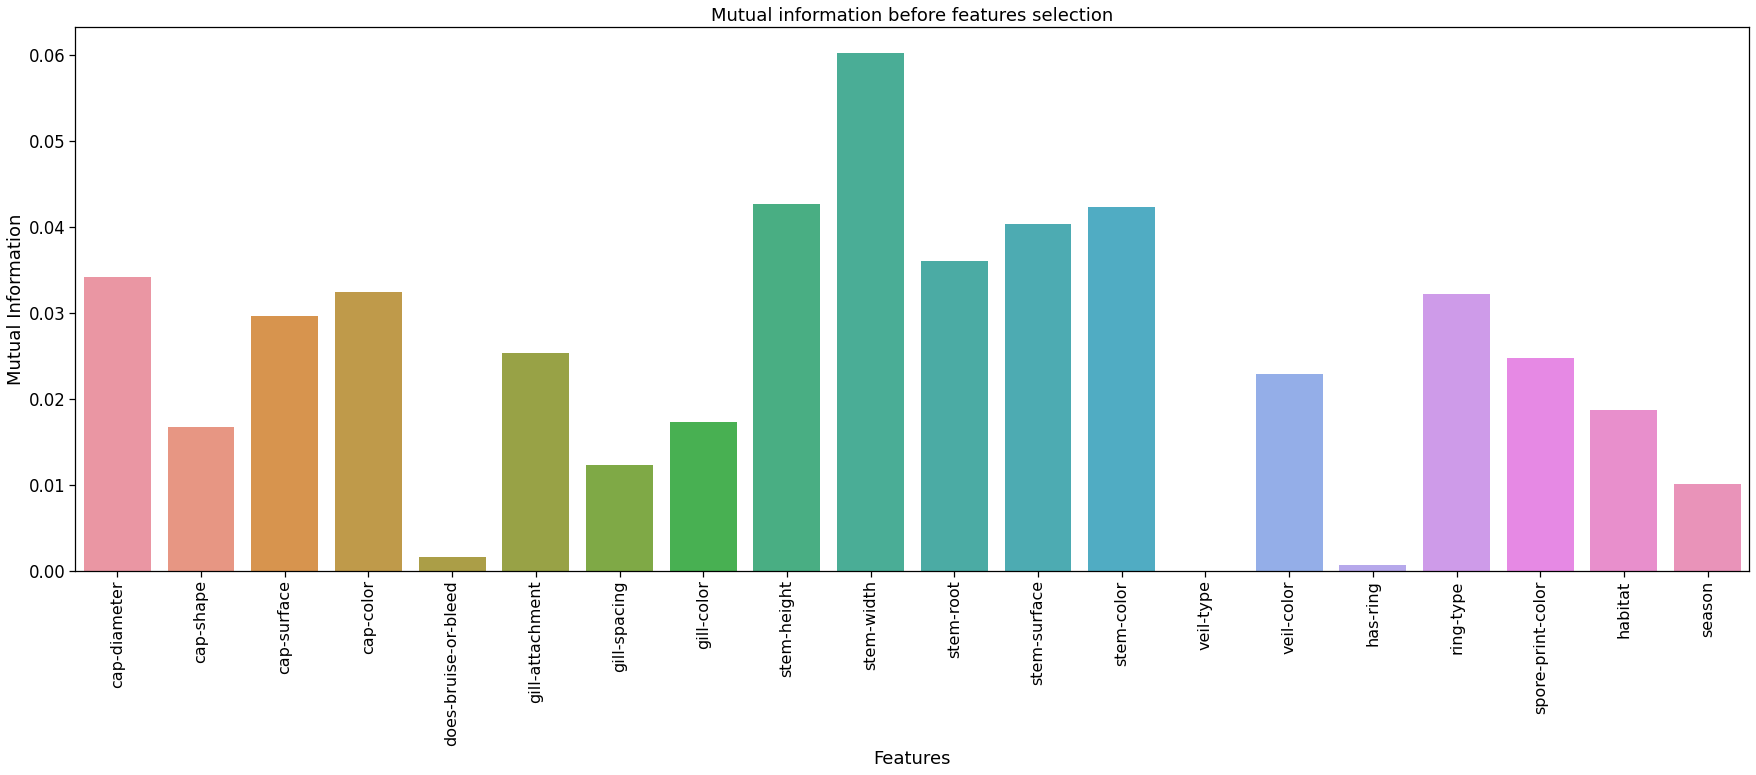

In [294]:
mi_total = mutual_info_classif(x_train,y_train)
f, ax = plt.subplots(figsize=(30, 10))
ax = sns.barplot(x = x_train.columns , y=mi_total)
ax.set(xlabel='Features', ylabel='Mutual Information')
ax.set(title='Mutual information before features selection')
ax.set_xticklabels(x_train.columns,rotation=90,fontsize=16)
plt.show()

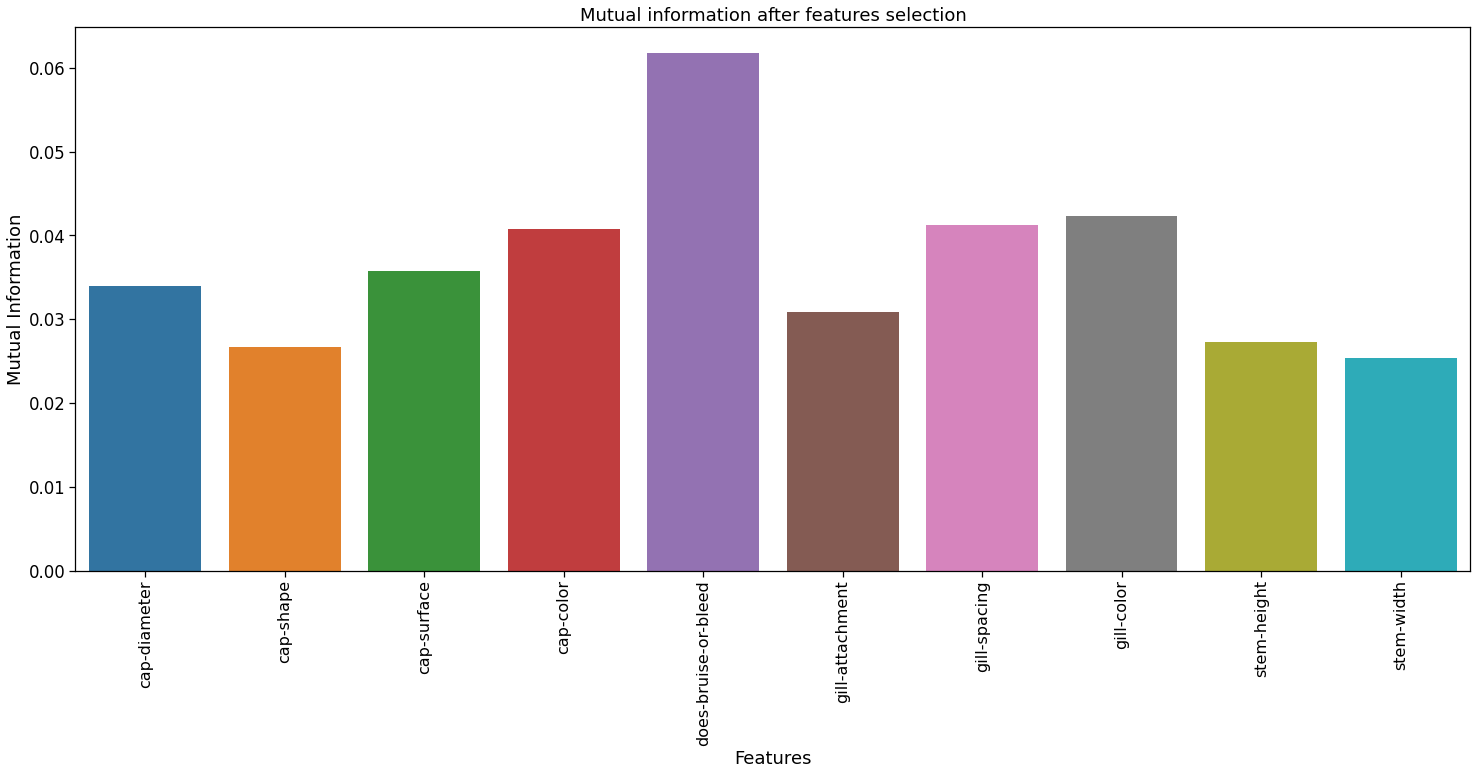

In [295]:
mi = mutual_info_classif(x_train_selected_mi,y_train)
mi_df =pd.DataFrame(x_train_selected_mi, columns=x_train_scaled.columns[model.get_support()])
f, ax = plt.subplots(figsize=(25, 10))
ax = sns.barplot(x = mi_df.columns , y=mi)
ax.set(xlabel='Features', ylabel='Mutual Information')
ax.set(title='Mutual information after features selection')
ax.set_xticklabels(x_train.columns,rotation=90,fontsize=16)
plt.show()

#### 2.3.2 Extra trees selection

Questa tecnica di feature selection sfrutta la costruzione di alberi di decisione caratterizzati da una particolare splitting rule.

Viene selezionato un sottoinsieme di attributi, e per ognuno di essi vengono generate una serie di soglie in maniera randomica; tra esse, solo la migliore verrà scelta come effettiva regola di suddivisione. Questo di solito consente di ridurre un po' di più la varianza del modello, a scapito di un aumento leggermente maggiore del bias.

Andiamo a selezionare i k attributi di importanza più alta quindi.

In [296]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x_train, y_train)
print(model.feature_importances_)
print(model.get_params)

[0.05296787 0.05851998 0.07571673 0.05293876 0.03732552 0.08965659
 0.08488448 0.06736436 0.04550297 0.06991412 0.04840851 0.06978755
 0.07761645 0.00973378 0.02317813 0.03005    0.03325569 0.02434095
 0.03414707 0.01469052]
<bound method BaseEstimator.get_params of ExtraTreesClassifier()>


In [297]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()  #il criterio utilizzato per lo split è GINI per GINI IMPURY - altrimenti potevamo usare ENTROPY per INFORMATION GAIN
dt.fit(x_train, y_train)


DecisionTreeClassifier()

/usr/local/lib/python3.7/dist-packages/graphviz

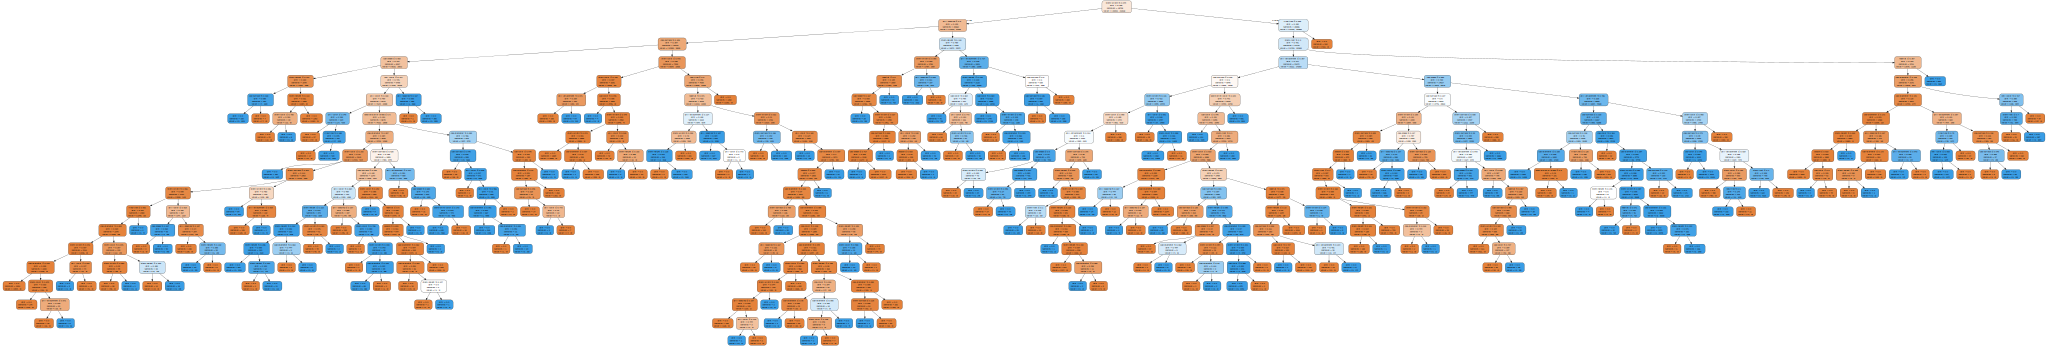

In [298]:
import os
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.7/dist-packages/graphviz'

dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=x_train.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)
graph.render()
graph

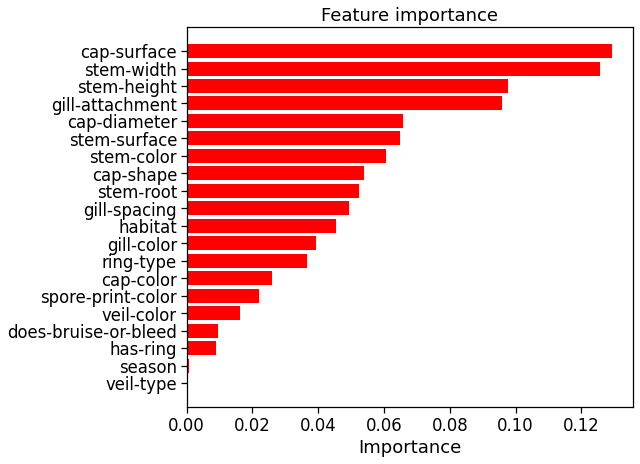

In [299]:
features_list = x_train.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

Selezioniamo quindi sulla base di una threshold le feature

In [300]:
THRESHOLD = .05

x_train_selected_et = pd.DataFrame()
x_test_selected_et = pd.DataFrame()

for i in range (0,len(dt.feature_importances_-1)):
  if dt.feature_importances_[i] > THRESHOLD:
    x_train_selected_et[x_train.columns[i]] = x_train[x_train.columns[i]]
    x_test_selected_et[x_test.columns[i]] = x_test[x_test.columns[i]]

print(x_train_selected_et.shape,x_test_selected_et.shape)

(48738, 9) (12185, 9)


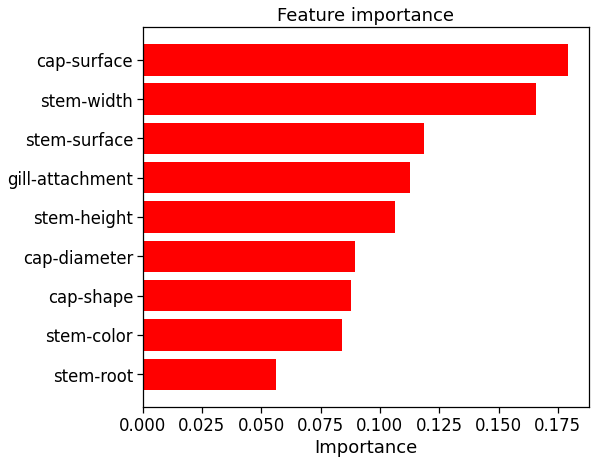

In [301]:
dt = DecisionTreeClassifier()
dt.fit(x_train_selected_et, y_train)

features_list = x_train_selected_et.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

### 2.5 Features Extraction

Con questa tecnica i dati vengono mappati in uno spazio dimensionalmente più piccolo, il tutto cercando di mantenere la fedeltà dei dati.
Noi ci utilizzeremo PCA

####2.4.1 PCA

<strong>PCA</strong> (Principal Component Analisys)  permette di mappare i dati in uno spazio dimensionalmente più piccolo mantenendo la fedeltà degli stessi, dove per fedeltà si intende la distanza tra il punto e la sua proiezione. 

Mappando i dati in uno spazio più piccolo ma mantenendo la varianza dei dati si garantiscono stime più accurate con uno sforzo computazionale da parte del modello inferiore. 

In particolare si mappano i dati in uno spazio dimensionale $d^I$ definito dagli autovettori relativi ai massimi autovalori che garantiscono quindi maggiore varianza.

Andiamo a vedere l'informazione che viene data dalla totalità delle componenti, per capire il numero di componenti necessarie per inglobare la maggior parte dell'informazione.

In [302]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

pca = PCA(n_components=20)
x_train_pca=pca.fit_transform(x_train) 
x_test_pca=pca.transform(x_test)
print("Original shape:",x_train.shape)
print('Shape of PCA data:',x_train_pca.shape)
print(("Explained Variance: %s") % (pca.explained_variance_ratio_))


Original shape: (48738, 20)
Shape of PCA data: (48738, 20)
Explained Variance: [0.1574318  0.11905874 0.08749434 0.08363774 0.08089992 0.07185266
 0.06613064 0.06312164 0.05145312 0.03939527 0.03528173 0.03404086
 0.03211688 0.02068558 0.01779836 0.01698451 0.0104376  0.00801689
 0.0028403  0.00132141]


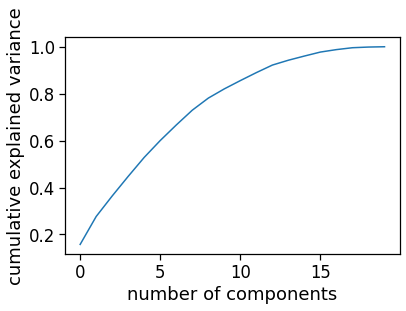

In [303]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

La maggior parte dell'informazione è inglobata nelle prime 10 componenti. Per questo abbiamo deciso di effettuare una features extraction con numero di componenti pari a 10, per avere un buon compromesso tra informazione e proiezione dello spazio delle features ottimale. 

In [304]:
pca = PCA(n_components=10)
x_train_pca=pca.fit_transform(x_train) 
x_test_pca=pca.transform(x_test)
print("Original shape:",x_train.shape)
print('Shape of PCA data:',x_train_pca.shape)
print(("Explained Variance: %s") % (pca.explained_variance_ratio_))


Original shape: (48738, 20)
Shape of PCA data: (48738, 10)
Explained Variance: [0.15744074 0.1190654  0.08749926 0.08364248 0.08090451 0.07185673
 0.06613435 0.06312517 0.05145603 0.0393975 ]


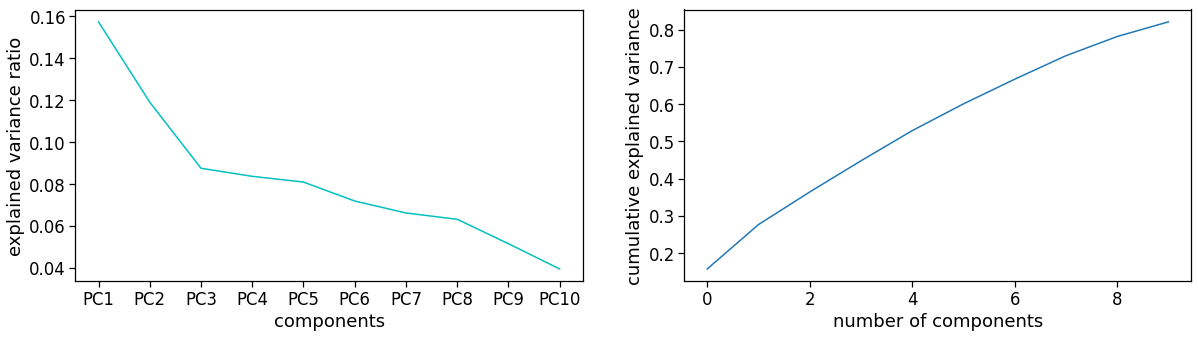

In [305]:
#Variance ratio
pc_df = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot("PC","var",  data=pc_df, color="c");
plt.ylabel('explained variance ratio');
plt.xlabel('components')

#Cumulative variance
plt.subplot(1,2,2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


##3 Classificatori

Andiamo ora ad effettuare uno studio sulla classificazione del testing set.
Ricordiamo che la matrice di confusione ha la seguente struttura:
$$
CM=
\begin{pmatrix}
TP & FP\\
FP & TN
\end{pmatrix}
$$
I punteggi derivanti dalla classificazione sono:

$$Accuracy = {\frac { TP + TN } {TP + FP + FN + TN}} $$

$$Recall = {\frac { TP } {TP + FN }} $$

$$Precision = {\frac { TP } {TP + FP }} $$



In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from matplotlib.colors import ListedColormap

In [307]:
#Definiamo la seguente funzione per calcolare le statistiche
def getStats(testing_set, predictions):
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  accuracy = accuracy_score(y_test, predictions)
  return round(precision,2),round(recall,2),round(accuracy,2)

In [308]:
#Definiamo la seguente funzione per agevolare la classificazione
def classify(classifier, training_set, testing_set):
  model = classifier.fit(training_set, y_train)
  predictions = model.predict(testing_set)
  
  score = model.score(testing_set, y_test)
  cm = metrics.confusion_matrix(y_test, predictions)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(score)
  plt.title(all_sample_title, size = 15);
  p,r,a=getStats(y_train,predictions)
  print("PRECISION: ",round(p,2))
  print("RECALL: ",round(r,2))
  print("ACCURACY: ",round(a,2))

  return model

####3.0 Hyperparameter tuning

Per tuning si intende trovare il numero ideale di un parametro di un certo classificatore.

Definiamo la seguente funzione per eseguire agevolmente il tuning nelle fasi successive.

In [309]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [310]:
def tune_up(classifier,parameters_ranges):
  grid = GridSearchCV(estimator=classifier, param_grid=parameters_ranges, cv=5)#5-fold cross validation
  grid.fit(x_train, y_train)
  return grid

### 3.1 Logistic Regression

#### 3.1.1 LR base

PRECISION:  0.63
RECALL:  0.54
ACCURACY:  0.66


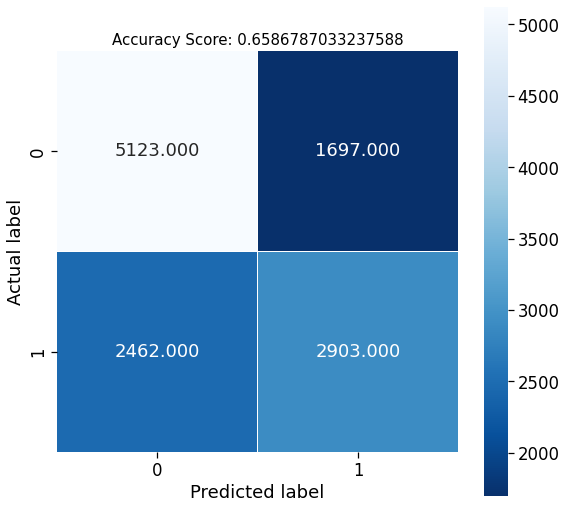

In [311]:
lr_base = classify(LogisticRegression(random_state=0),x_train,x_test)

#### 3.1.2 LR con MI

PRECISION:  0.58
RECALL:  0.45
ACCURACY:  0.61


LogisticRegression(random_state=0)

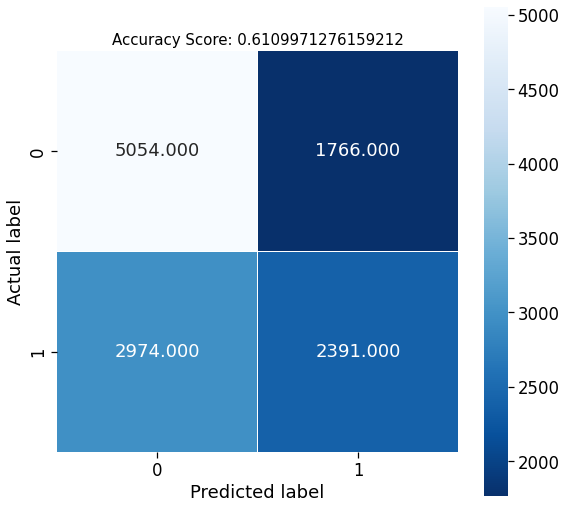

In [312]:
classify(LogisticRegression(random_state=0),x_train_selected_mi,x_test_selected_mi)

#### 3.1.3 LR con ET

PRECISION:  0.57
RECALL:  0.44
ACCURACY:  0.61


LogisticRegression(random_state=0)

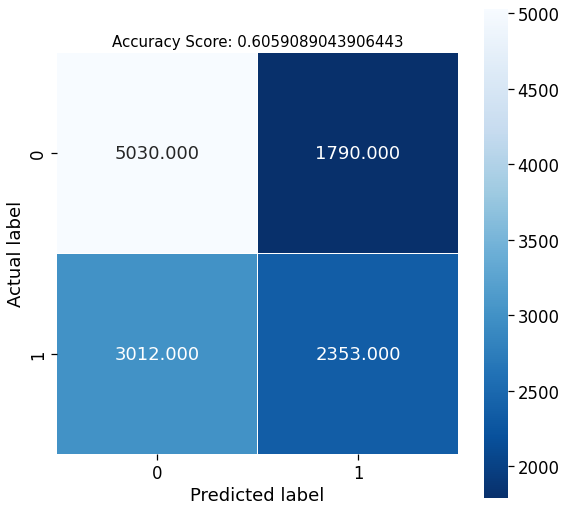

In [313]:
classify(LogisticRegression(random_state=0),x_train_selected_et,x_test_selected_et)

#### 3.1.4 LR con PCA

PRECISION:  0.58
RECALL:  0.4
ACCURACY:  0.61


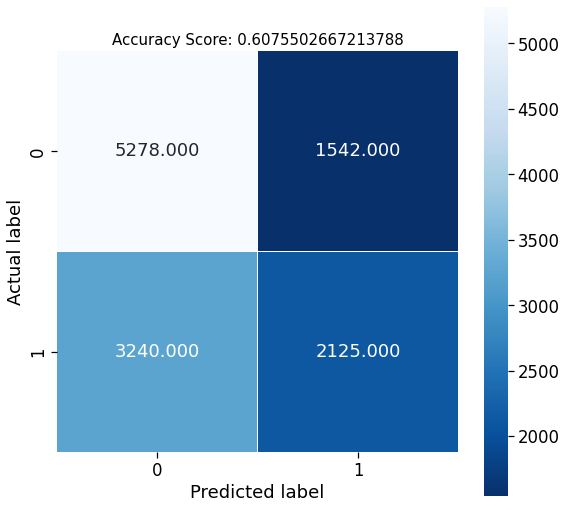

In [314]:
lr_pca= classify(LogisticRegression(random_state=0),x_train_pca,x_test_pca)

####3.1.5 LR con tuning

PRECISION:  0.63
RECALL:  0.54
ACCURACY:  0.66


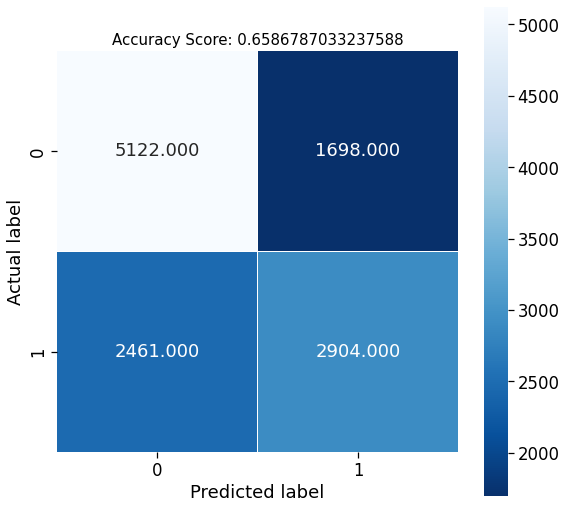

In [315]:
parameters_dictionary = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid = tune_up(LogisticRegression(),parameters_dictionary)
params = grid.best_params_

lr_tuning = classify(LogisticRegression(solver=params.get('solver')),x_train,x_test)

### 3.2 Linear discriminant analysis

#### 3.2.1 LDA base

PRECISION:  0.63
RECALL:  0.54
ACCURACY:  0.66


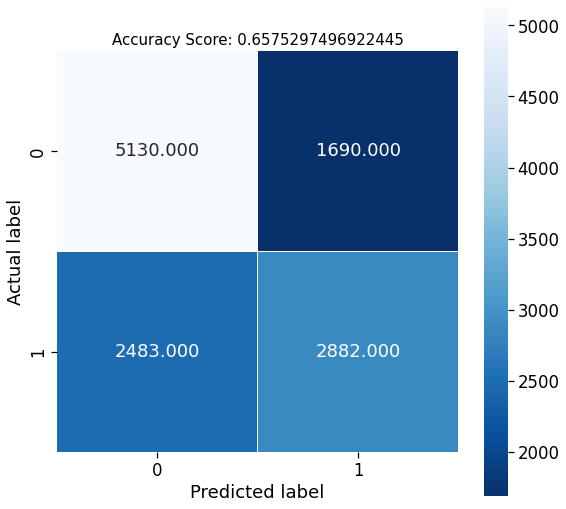

In [316]:
lda_base =classify(LinearDiscriminantAnalysis(),x_train,x_test)

#### 3.2.2 LDA con MI

PRECISION:  0.58
RECALL:  0.44
ACCURACY:  0.61


LinearDiscriminantAnalysis()

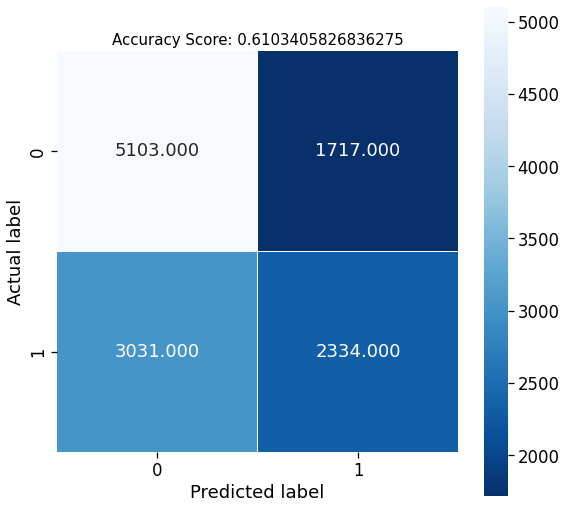

In [317]:
classify(LinearDiscriminantAnalysis(),x_train_selected_mi,x_test_selected_mi)

#### 3.2.3 LDA con ET

PRECISION:  0.57
RECALL:  0.43
ACCURACY:  0.6


LinearDiscriminantAnalysis()

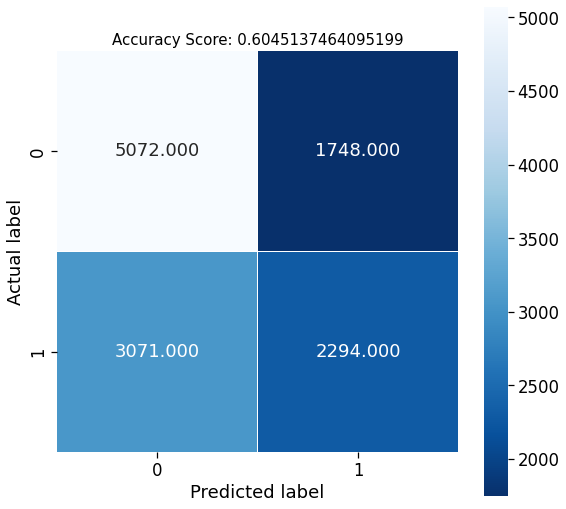

In [318]:
classify(LinearDiscriminantAnalysis(),x_train_selected_et,x_test_selected_et)

#### 3.2.4 LDA con PCA

PRECISION:  0.58
RECALL:  0.4
ACCURACY:  0.61


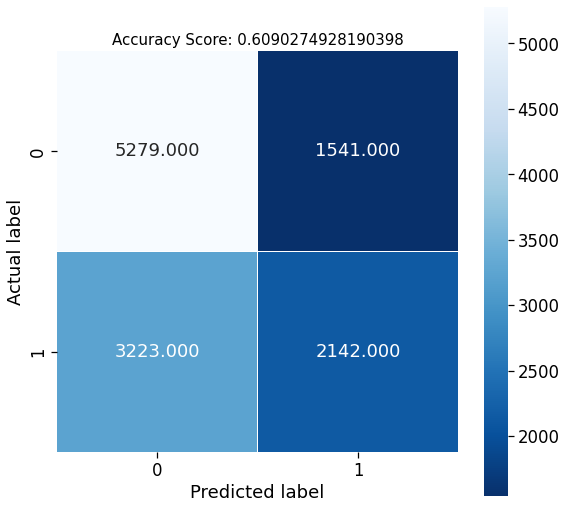

In [319]:
lda_pca = classify(LinearDiscriminantAnalysis(),x_train_pca,x_test_pca)

####3.2.5 LDA con tuning

PRECISION:  0.63
RECALL:  0.54
ACCURACY:  0.66


LinearDiscriminantAnalysis(solver='lsqr')

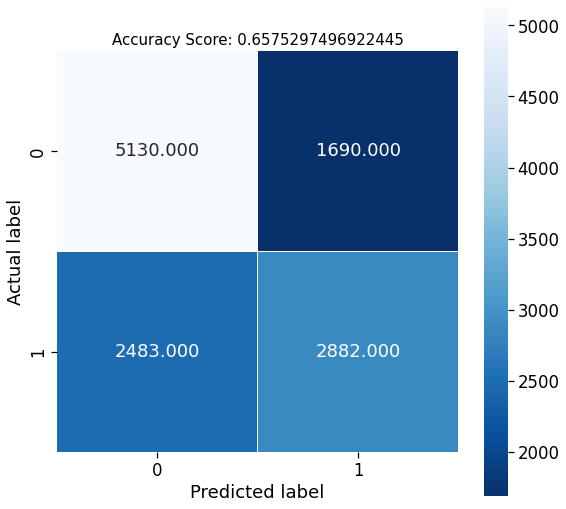

In [320]:
parameters_dictionary = {'solver':['svd', 'lsqr', 'eigen']}

grid = tune_up(LinearDiscriminantAnalysis(),parameters_dictionary)
params = grid.best_params_

classify(LinearDiscriminantAnalysis(solver=params.get('solver')),x_train,x_test)

###3.3 Naive Bayes

####3.3.1 Naive Bayes base

PRECISION:  0.58
RECALL:  0.53
ACCURACY:  0.62


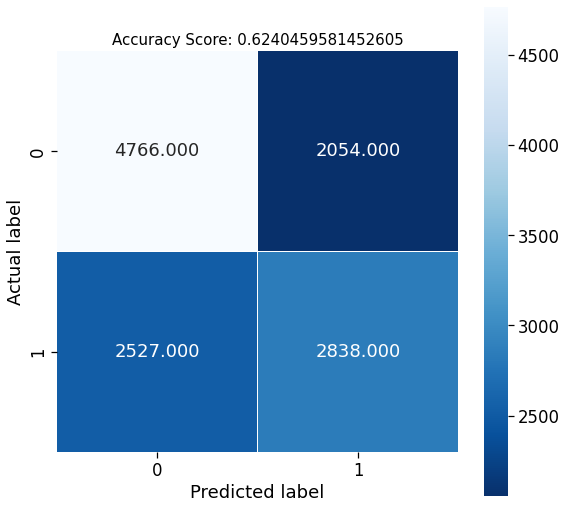

In [321]:
nb_base = classify(GaussianNB(),x_train,x_test)

####3.3.2 Naive Bayes con MI

PRECISION:  0.58
RECALL:  0.39
ACCURACY:  0.61


GaussianNB()

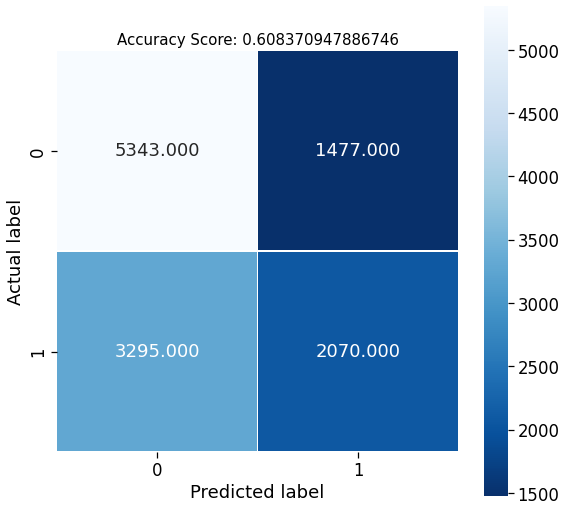

In [322]:
classify(GaussianNB(),x_train_selected_mi,x_test_selected_mi)

####3.3.3 Naive Bayes con ET

PRECISION:  0.6
RECALL:  0.33
ACCURACY:  0.61


GaussianNB()

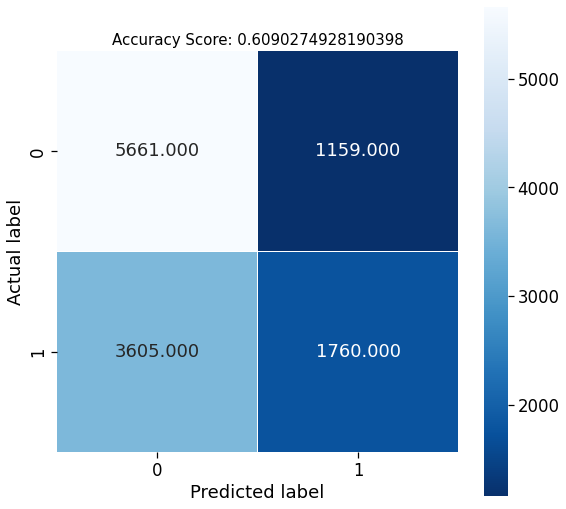

In [323]:
classify(GaussianNB(),x_train_selected_et,x_test_selected_et)

####3.3.4 Naive Bayes con PCA

PRECISION:  0.58
RECALL:  0.49
ACCURACY:  0.62


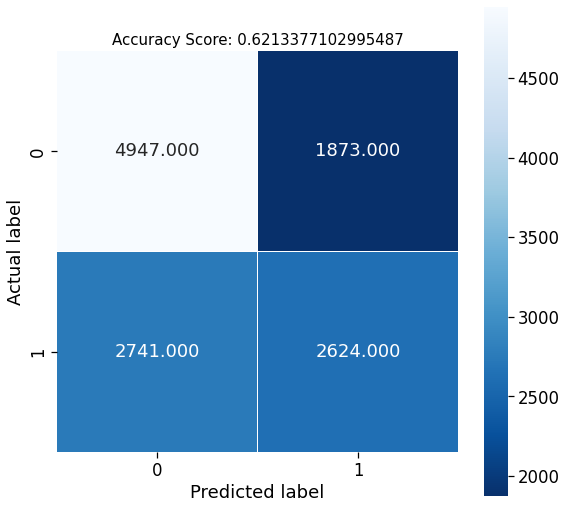

In [324]:
nb_pca= classify(GaussianNB(),x_train_pca,x_test_pca)

####3.3.5 NB con tuning

PRECISION:  0.58
RECALL:  0.53
ACCURACY:  0.62


GaussianNB(var_smoothing=0.0001232846739442066)

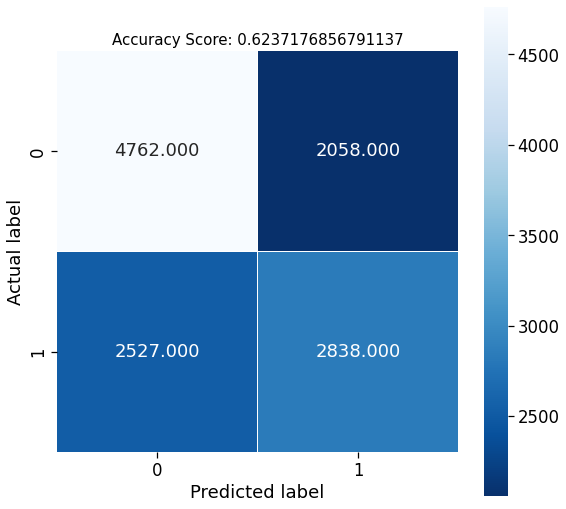

In [325]:
parameters_dictionary = {'var_smoothing': np.logspace(0,-9, num=100)}

grid = tune_up(GaussianNB(),parameters_dictionary)
params = grid.best_params_

classify(GaussianNB(var_smoothing=params.get('var_smoothing')),x_train,x_test)

###3.4 Random Forest

####3.4.1 Random Forest base

PRECISION:  1.0
RECALL:  1.0
ACCURACY:  1.0


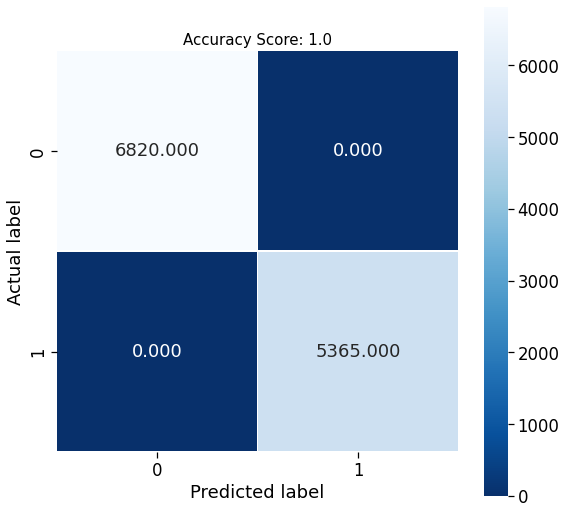

In [326]:
rf_base = classify(RandomForestClassifier(n_estimators=100, random_state=42),x_train,x_test)

####3.4.2 Random Forest con MI

PRECISION:  1.0
RECALL:  1.0
ACCURACY:  1.0


RandomForestClassifier(random_state=42)

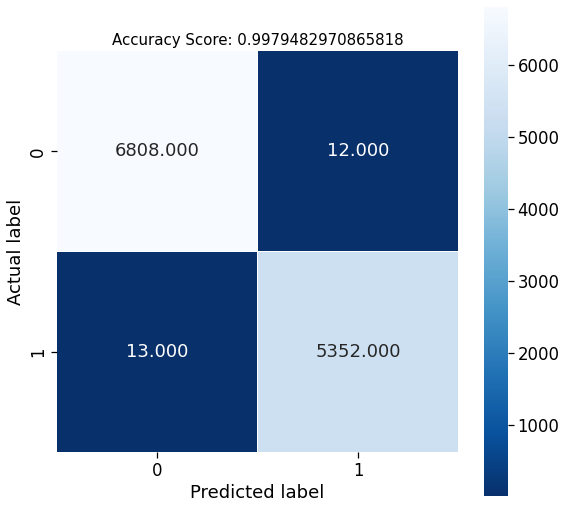

In [327]:
classify(RandomForestClassifier(n_estimators=100, random_state=42),x_train_selected_mi,x_test_selected_mi)

####3.4.3 Random Forest con ET

PRECISION:  1.0
RECALL:  1.0
ACCURACY:  1.0


RandomForestClassifier(random_state=42)

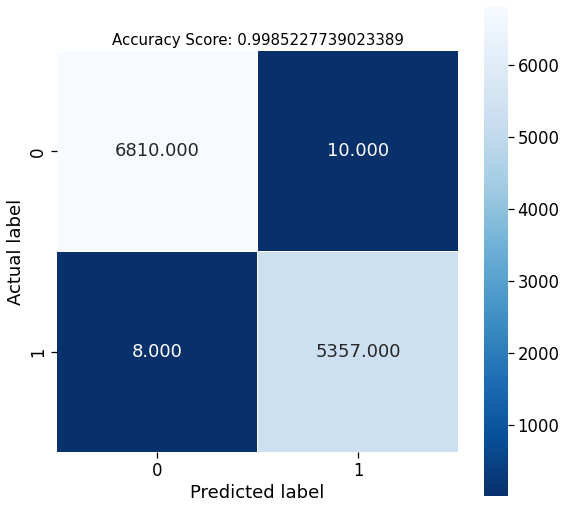

In [328]:
classify(RandomForestClassifier(n_estimators=100, random_state=42),x_train_selected_et,x_test_selected_et)

####3.4.4 Random Forest con PCA

PRECISION:  1.0
RECALL:  1.0
ACCURACY:  1.0


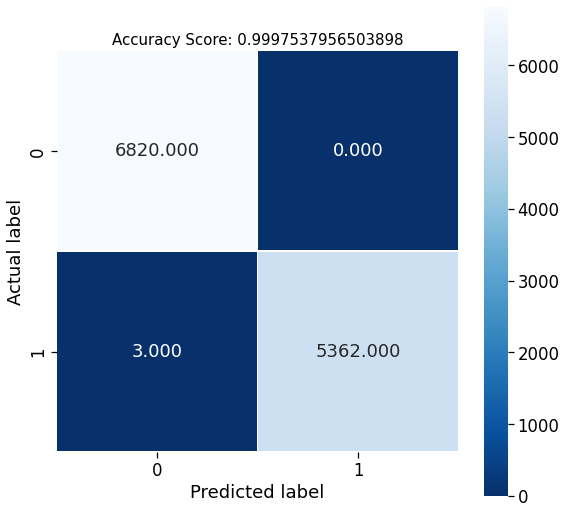

In [329]:
rf_pca= classify(RandomForestClassifier(n_estimators=100, random_state=42),x_train_pca,x_test_pca)

####3.4.5 RF con tuning

PRECISION:  1.0
RECALL:  1.0
ACCURACY:  1.0


RandomForestClassifier(max_features=1, n_estimators=70)

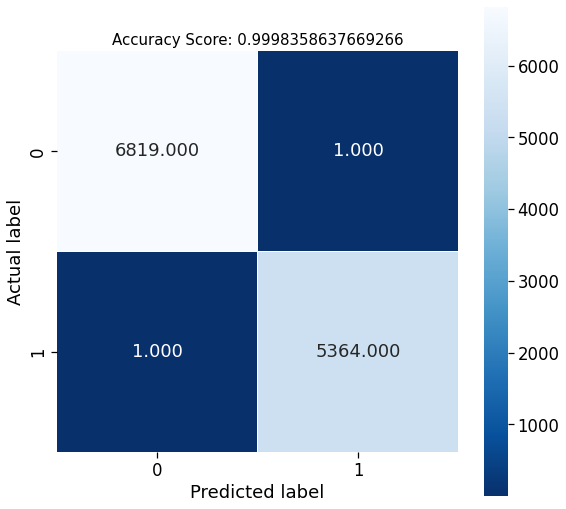

In [330]:
parameters_dictionary = {'max_features':np.arange(1,4,1),
                         'n_estimators':np.arange(10,110,10)}

grid = tune_up(RandomForestClassifier(),parameters_dictionary)
params = grid.best_params_

classify(RandomForestClassifier(max_features=params.get('max_features'),n_estimators=params.get('n_estimators')),x_train,x_test)

Stampiamo il grafico degli iperparametri

In [331]:
import plotly.graph_objects as go

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()

grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')

x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

###3.5 Rete Neurale



####3.5.1 Tuning Multi-Layer Perceptron classifier

In [332]:
from sklearn.neural_network import MLPClassifier


In [333]:
MLPClassifier().get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
'''
parameters_dictionary = {'hidden_layer_sizes':[5,10,50,250],
                         'learning_rate_init':[0.001,0.005,0.05,0.01, 0.1,],
                         'solver':['sgd'],
                         'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
                         }
'''
parameters_dictionary = {'hidden_layer_sizes':[3,5],
                         'learning_rate_init':[0.001],
                         'solver':['sgd'],
                         'activation' : ['relu']
                         }

grid = tune_up(MLPClassifier() ,parameters_dictionary)
params = grid.best_params_


PRECISION:  0.77
RECALL:  0.76
ACCURACY:  0.79


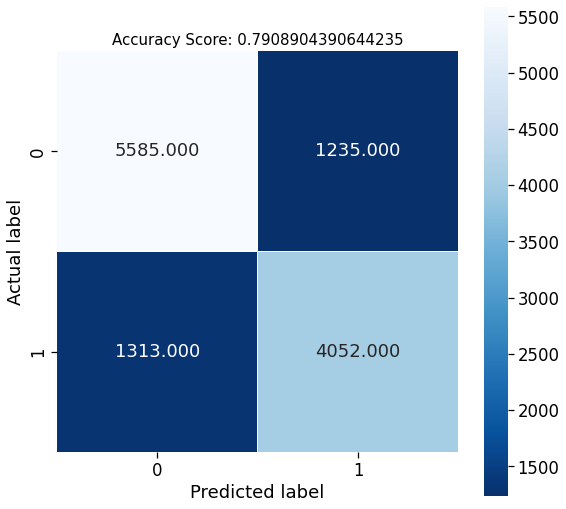

In [335]:
mlp_base = classify(MLPClassifier(hidden_layer_sizes=params.get('hidden_layer_sizes'),
                       learning_rate_init=params.get('learning_rate_init'),
                       solver=params.get('solver'),
                       activation=params.get('activation')
                       ),x_train,x_test)

####3.5.1 Multi-layer Perceptron classifier

In [336]:
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(x_test, y_test))

Epoch 1/300
48/48 [==============================] - 1s 7ms/step - loss: 0.6730 - acc: 0.5719 - val_loss: 0.6566 - val_acc: 0.6076
Epoch 2/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6449 - acc: 0.6173 - val_loss: 0.6330 - val_acc: 0.6345
Epoch 3/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6223 - acc: 0.6492 - val_loss: 0.6126 - val_acc: 0.6627
Epoch 4/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6032 - acc: 0.6684 - val_loss: 0.5949 - val_acc: 0.6709
Epoch 5/300
48/48 [==============================] - 0s 3ms/step - loss: 0.5865 - acc: 0.6836 - val_loss: 0.5788 - val_acc: 0.6893
Epoch 6/300
48/48 [==============================] - 0s 3ms/step - loss: 0.5710 - acc: 0.6976 - val_loss: 0.5642 - val_acc: 0.7059
Epoch 7/300
48/48 [==============================] - 0s 3ms/step - loss: 0.5562 - acc: 0.7124 - val_loss: 0.5502 - val_acc: 0.7204
Epoch 8/300
48/48 [==============================] - 0s 3ms/step - loss: 0.5426 - a

In [337]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                672       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [338]:
def plot_loss(history, num):

    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, num_epochs+1)

    plt.figure()
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return(loss_values, val_loss_values)

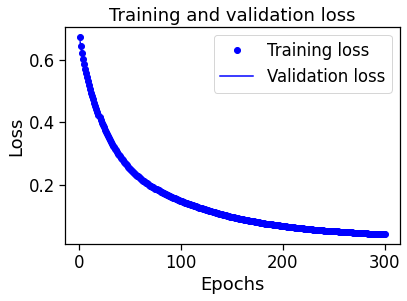

In [339]:
loss_values,val_loss_values = plot_loss(history, num_epochs)


In [340]:
np.min(val_loss_values)


0.04180530086159706

In [341]:
def plot_accuracy(history, num):
  
    history_dict = history.history
    epochs = range(1, num_epochs+1)
    plt.figure()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return(acc_values, val_acc_values)

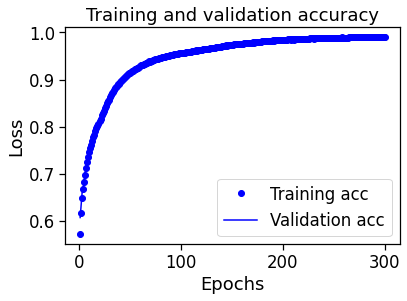

In [342]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [343]:
np.max(val_acc_values)


0.9900697469711304

## 4 Considerazioni e confronti

In [344]:
def plot_comparison(model1, model2, model3, model4, model5, x_train, x_test, title ) :
 plt.figure(figsize=(15,10))
 models = [
 {
    'label': type(model1).__name__ ,
    'model': model1,
 },
 {
    'label': type(model2).__name__,
    'model': model2,
 },
 {
    'label': type(model3).__name__,
    'model': model3,
 },
 {
    'label': type(model4).__name__,
    'model': model4,
 },
 {
    'label': type(model5).__name__,
    'model': model5,
 }
 ]

 for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

 plt.plot([0, 1], [0, 1],'r--')
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.05])
 plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
 plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
 plt.title('Receiver Operating Characteristic (ROC) : '+title, fontsize=15)
 plt.legend(loc="lower right", fontsize=15)
 plt.savefig("roc.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
 plt.show()

### 4.1 ROC AREA

#### 4.1.1 Confronto BASE

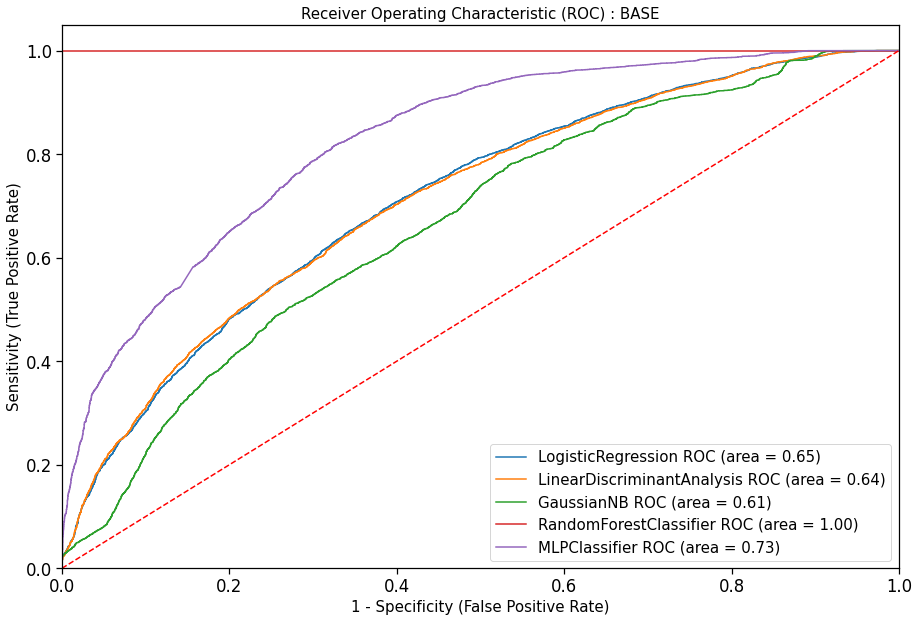

In [345]:
plot_comparison(lr_base,lda_base,nb_base,rf_base,mlp_base,x_train,x_test,"BASE")

#### 4.1.2 Confronto PCA

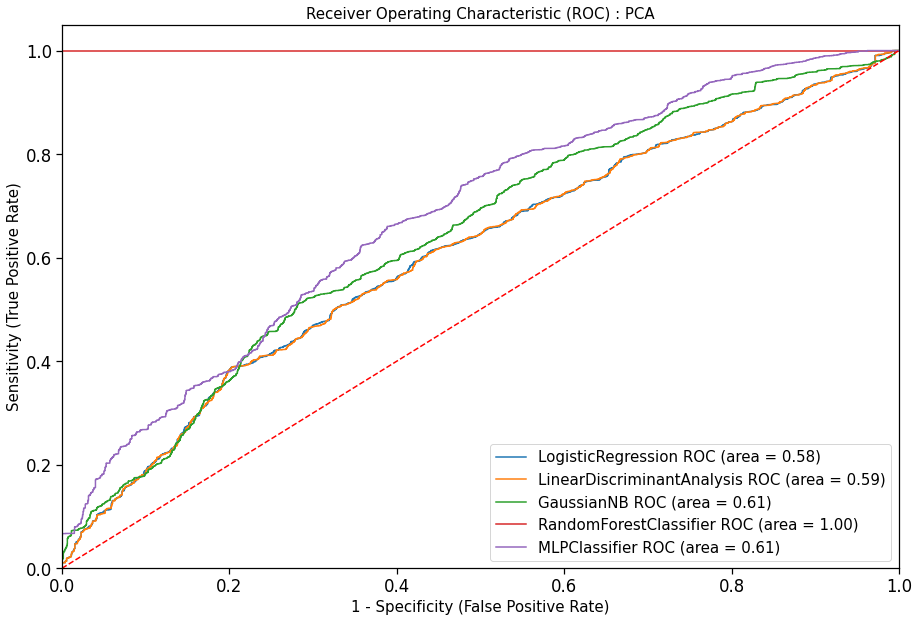

In [346]:
plot_comparison(lr_pca,lda_pca,nb_pca,rf_pca,mlp_base,x_train_pca,x_test_pca,"PCA")